In [1]:
#change working directory
import os
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/CAPSTONE_PROJ_TEST/notebooks'

In [2]:
#set the current directory
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory.")

You set a new current directory.


In [3]:
current_dir = os.getcwd()
current_dir

'/Users/jacobambat/dev/CAPSTONE_PROJ_TEST'

In [4]:
#import packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly.express as px

In [5]:
#load dataset
df = pd.read_csv("data/raw/cancer_patient_data.csv")

In [6]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    9500 non-null   object 
 1   Country                       9500 non-null   object 
 2   Region                        9500 non-null   object 
 3   Age                           9500 non-null   float64
 4   Gender                        9500 non-null   object 
 5   Cancer Type                   9500 non-null   object 
 6   Cancer Stage                  9500 non-null   object 
 7   Diagnosis Date                9500 non-null   object 
 8   Treatment Start Date          9500 non-null   object 
 9   Treatment End Date            9500 non-null   object 
 10  Treatment Type                9500 non-null   object 
 11  Hospital Type                 9500 non-null   object 
 12  Survival Status               9500 non-null   object 
 13  Su

In [7]:
#get the general overview of dataset with head
df.head()

,Patient ID,Country,Region,Age,Gender,Cancer Type,Cancer Stage,Diagnosis Date,Treatment Start Date,Treatment End Date,...,Alcohol Consumption,BMI,Socioeconomic Status,Urban vs. Rural,Healthcare System,Follow-up Visits,Recurrence,Clinical Trial Participation,Comorbidities,Quality of Life Score
0,PT00001,Finland,Southwest Finland,89.0,Male,Breast,III,2015-08-10,2015-09-20,2016-09-07,...,Moderate,39.3,Medium,Urban,NHS,12.0,Yes,Yes,Diabetes,5.0
1,PT00002,Belgium,Flanders,49.0,Female,Prostate,IV,2010-01-27,2010-06-29,2011-02-09,...,Moderate,21.6,High,Rural,Private Insurance,10.0,NaN,Yes,Diabetes,10.0
2,PT00003,Poland,Silesian,42.0,Male,Lung,III,2016-08-25,2016-10-23,2016-12-27,...,NaN,23.7,Low,NaN,Statutory Health Insurance,5.0,No,No,Obesity,1.0
3,PT00004,Ireland,Dublin,51.0,Female,Prostate,III,NaN,NaN,2011-02-28,...,Moderate,34.0,Medium,Rural,Private Insurance,4.0,Yes,No,Diabetes,5.0
4,PT00005,NaN,Sicily,76.0,Female,Lung,II,2018-05-26,NaN,2019-04-20,...,NaN,33.9,Medium,Urban,Statutory Health Insurance,5.0,No,No,Hypertension,6.0


In [8]:
#get list of collumn names in dataset
df.columns.tolist()

['Patient ID',
 'Country',
 'Region',
 'Age',
 'Gender',
 'Cancer Type',
 'Cancer Stage',
 'Diagnosis Date',
 'Treatment Start Date',
 'Treatment End Date',
 'Treatment Type',
 'Hospital Type',
 'Survival Status',
 'Survival Duration (Months)',
 'Genetic Markers',
 'Family History',
 'Smoking Status',
 'Alcohol Consumption',
 'BMI',
 'Socioeconomic Status',
 'Urban vs. Rural',
 'Healthcare System',
 'Follow-up Visits',
 'Recurrence',
 'Clinical Trial Participation',
 'Comorbidities',
 'Quality of Life Score']

In [9]:
#checking the missing values
df.isnull().sum()

Patient ID                       500
Country                          500
Region                           500
Age                              500
Gender                           500
Cancer Type                      500
Cancer Stage                     500
Diagnosis Date                   500
Treatment Start Date             500
Treatment End Date               500
Treatment Type                   500
Hospital Type                    500
Survival Status                  500
Survival Duration (Months)       969
Genetic Markers                 2815
Family History                   500
Smoking Status                   500
Alcohol Consumption             4299
BMI                              500
Socioeconomic Status             500
Urban vs. Rural                  500
Healthcare System                500
Follow-up Visits                 500
Recurrence                       500
Clinical Trial Participation     500
Comorbidities                   2463
Quality of Life Score            500
d

In [10]:
#drop collumns which are not relevant
#df = df.drop('Region', axis=1)
#df = df.drop('Hospital Type', axis=1)
#df = df.drop('Socioeconomic Status', axis=1)
#df = df.drop('Follow-up Visits', axis=1)

In [10]:
#drop the rows with NaN
df = df.dropna(axis=0, subset=['Patient ID'])
df = df.dropna(axis=0, subset=['Country'])
df = df.dropna(axis=0, subset=['Age'])
df = df.dropna(axis=0, subset=['Gender'])
df = df.dropna(axis=0, subset=['Cancer Type'])
df = df.dropna(axis=0, subset=['Cancer Stage'])
df = df.dropna(axis=0, subset=['Diagnosis Date'])
df = df.dropna(axis=0, subset=['Treatment Start Date'])
df = df.dropna(axis=0, subset=['Treatment End Date'])
df = df.dropna(axis=0, subset=['Treatment Type'])
df = df.dropna(axis=0, subset=['Urban vs. Rural'])
df = df.dropna(axis=0, subset=['Healthcare System'])
df = df.dropna(axis=0, subset=['Recurrence'])

In [12]:
df = df.dropna(axis=0, subset=['Region'])
df = df.dropna(axis=0, subset=['Hospital Type'])
df = df.dropna(axis=0, subset=['Socioeconomic Status'])
df = df.dropna(axis=0, subset=['Follow-up Visits'])

In [14]:
# Replace empty strings and NaN with 'Unknown' 
df['Survival Status'] = df['Survival Status'].fillna('Unknown')
df['Genetic Markers'] = df['Genetic Markers'].fillna('Unknown')
df['Family History'] = df['Family History'].fillna('Unknown')
df['Smoking Status'] = df['Smoking Status'].fillna('Unknown')
df['Alcohol Consumption'] = df['Alcohol Consumption'].fillna('Unknown')
df['Clinical Trial Participation'] = df['Clinical Trial Participation'].fillna('Unknown')
df['Comorbidities'] = df['Comorbidities'].fillna('Unknown')

In [16]:
#Replace survival duration (months) collumn NaN with mean value
df['Survival Duration (Months)'] = df['Survival Duration (Months)'].fillna(df['Survival Duration (Months)'].mean(numeric_only=True))


In [17]:
#convert the collumn 'Survival Duration (Months)' values datatype to int
df['Survival Duration (Months)'] = df['Survival Duration (Months)'].astype(int)

In [18]:
#Replace BMI collumn NaN with NaN with median value
df['BMI'] = df['BMI'].fillna(df['BMI'].median())


In [19]:
#Replace 'Quality of Life Score' collumn NaN with forward fill
df['Quality of Life Score'] = df['Quality of Life Score'].fillna(method='ffill')  # Use previous value


/var/folders/gl/0lwk2tfs4vl_g741g8k44m500000gn/T/ipykernel_46097/2990302685.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Quality of Life Score'] = df['Quality of Life Score'].fillna(method='ffill')  # Use previous value


In [20]:
#convert the collumn 'Quality of Life Scor' values datatype to int
df['Quality of Life Score'] = df['Quality of Life Score'].astype(int)

In [21]:
#check for duplicate rows
duplicate_check= df.duplicated().any()
print('There are duplicates:', duplicate_check)

There are duplicates: False


In [22]:
#convert the collumn 'Age' to int
df['Age'] = df['Age'].astype(int)

In [23]:
df.isnull().sum()

Patient ID                      0
Country                         0
Region                          0
Age                             0
Gender                          0
Cancer Type                     0
Cancer Stage                    0
Diagnosis Date                  0
Treatment Start Date            0
Treatment End Date              0
Treatment Type                  0
Hospital Type                   0
Survival Status                 0
Survival Duration (Months)      0
Genetic Markers                 0
Family History                  0
Smoking Status                  0
Alcohol Consumption             0
BMI                             0
Socioeconomic Status            0
Urban vs. Rural                 0
Healthcare System               0
Follow-up Visits                0
Recurrence                      0
Clinical Trial Participation    0
Comorbidities                   0
Quality of Life Score           0
dtype: int64

In [26]:
#checking for NaN or empty values
df.dropna(axis=1, how='all')

,Patient ID,Country,Region,Age,Gender,Cancer Type,Cancer Stage,Diagnosis Date,Treatment Start Date,Treatment End Date,...,Alcohol Consumption,BMI,Socioeconomic Status,Urban vs. Rural,Healthcare System,Follow-up Visits,Recurrence,Clinical Trial Participation,Comorbidities,Quality of Life Score
0,PT00001,Finland,Southwest Finland,89,Male,Breast,III,2015-08-10,2015-09-20,2016-09-07,...,Moderate,39.3,Medium,Urban,NHS,12.0,Yes,Yes,Diabetes,5
5,PT00006,Sweden,Västra Götaland,28,Male,Pancreatic,IV,2019-03-06,2019-05-16,2020-03-23,...,Unknown,23.2,Medium,Urban,Private Insurance,15.0,No,No,Obesity,6
9,PT00010,Spain,Andalusia,77,Female,Ovarian,I,2013-07-22,2013-11-08,2014-11-04,...,Unknown,38.3,Medium,Rural,Statutory Health Insurance,7.0,No,No,Hypertension,7
10,PT00011,Spain,Andalusia,22,Female,Pancreatic,II,2012-12-27,2013-06-06,2013-12-27,...,Heavy,21.9,Medium,Urban,NHS,18.0,No,No,Unknown,2
15,PT00016,Germany,North Rhine-Westphalia,53,Male,Breast,I,2012-07-24,2012-08-14,2013-03-14,...,Unknown,37.5,Medium,Urban,Private Insurance,12.0,Yes,No,Hypertension,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9990,PT09991,Ireland,Munster,57,Male,Lung,I,2016-03-28,2016-06-17,2017-02-06,...,Unknown,21.1,Medium,Urban,Private Insurance,17.0,Yes,Yes,Unknown,7
9992,PT09993,Norway,Trøndelag,89,Female,Breast,I,2020-11-12,2020-12-01,2021-01-01,...,Unknown,20.8,Low,Rural,NHS,16.0,Yes,No,Unknown,1
9993,PT09994,Denmark,Zealand,43,Male,Colorectal,I,2010-05-30,2010-08-25,2011-06-07,...,Moderate,20.1,High,Rural,NHS,12.0,No,No,Obesity,1
9994,PT09995,Belgium,Wallonia,36,Male,Breast,III,2013-02-06,2013-03-05,2013-12-23,...,Moderate,22.5,Medium,Urban,Private Insurance,10.0,No,No,Hypertension,1


In [27]:
df.reset_index(drop=True, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4210 entries, 0 to 4209
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    4210 non-null   object 
 1   Country                       4210 non-null   object 
 2   Region                        4210 non-null   object 
 3   Age                           4210 non-null   int64  
 4   Gender                        4210 non-null   object 
 5   Cancer Type                   4210 non-null   object 
 6   Cancer Stage                  4210 non-null   object 
 7   Diagnosis Date                4210 non-null   object 
 8   Treatment Start Date          4210 non-null   object 
 9   Treatment End Date            4210 non-null   object 
 10  Treatment Type                4210 non-null   object 
 11  Hospital Type                 4210 non-null   object 
 12  Survival Status               4210 non-null   object 
 13  Sur

In [30]:
df

,Patient ID,Country,Region,Age,Gender,Cancer Type,Cancer Stage,Diagnosis Date,Treatment Start Date,Treatment End Date,...,Alcohol Consumption,BMI,Socioeconomic Status,Urban vs. Rural,Healthcare System,Follow-up Visits,Recurrence,Clinical Trial Participation,Comorbidities,Quality of Life Score
0,PT00001,Finland,Southwest Finland,89,Male,Breast,III,2015-08-10,2015-09-20,2016-09-07,...,Moderate,39.3,Medium,Urban,NHS,12.0,Yes,Yes,Diabetes,5
1,PT00006,Sweden,Västra Götaland,28,Male,Pancreatic,IV,2019-03-06,2019-05-16,2020-03-23,...,Unknown,23.2,Medium,Urban,Private Insurance,15.0,No,No,Obesity,6
2,PT00010,Spain,Andalusia,77,Female,Ovarian,I,2013-07-22,2013-11-08,2014-11-04,...,Unknown,38.3,Medium,Rural,Statutory Health Insurance,7.0,No,No,Hypertension,7
3,PT00011,Spain,Andalusia,22,Female,Pancreatic,II,2012-12-27,2013-06-06,2013-12-27,...,Heavy,21.9,Medium,Urban,NHS,18.0,No,No,Unknown,2
4,PT00016,Germany,North Rhine-Westphalia,53,Male,Breast,I,2012-07-24,2012-08-14,2013-03-14,...,Unknown,37.5,Medium,Urban,Private Insurance,12.0,Yes,No,Hypertension,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,PT09991,Ireland,Munster,57,Male,Lung,I,2016-03-28,2016-06-17,2017-02-06,...,Unknown,21.1,Medium,Urban,Private Insurance,17.0,Yes,Yes,Unknown,7
4206,PT09993,Norway,Trøndelag,89,Female,Breast,I,2020-11-12,2020-12-01,2021-01-01,...,Unknown,20.8,Low,Rural,NHS,16.0,Yes,No,Unknown,1
4207,PT09994,Denmark,Zealand,43,Male,Colorectal,I,2010-05-30,2010-08-25,2011-06-07,...,Moderate,20.1,High,Rural,NHS,12.0,No,No,Obesity,1
4208,PT09995,Belgium,Wallonia,36,Male,Breast,III,2013-02-06,2013-03-05,2013-12-23,...,Moderate,22.5,Medium,Urban,Private Insurance,10.0,No,No,Hypertension,1


In [32]:
#Get BMI min and Max value
df['BMI'].agg(['min','max'])

min    18.0
max    40.0
Name: BMI, dtype: float64

In [33]:
# Define BMI categories using apply and lambda and using discretisation and binning the bmi categories
df["BMI_Category"] = df["BMI"].apply(lambda x: 
                                     "Underweight" if x < 18.5 else 
                                     "Normal weight" if x < 25 else 
                                     "Overweight" if x < 30 else 
                                     "Obese")

# Print the DataFrame
print(df)

     Patient ID  Country                  Region  Age  Gender Cancer Type  \
0       PT00001  Finland       Southwest Finland   89    Male      Breast   
1       PT00006   Sweden         Västra Götaland   28    Male  Pancreatic   
2       PT00010    Spain               Andalusia   77  Female     Ovarian   
3       PT00011    Spain               Andalusia   22  Female  Pancreatic   
4       PT00016  Germany  North Rhine-Westphalia   53    Male      Breast   
...         ...      ...                     ...  ...     ...         ...   
4205    PT09991  Ireland                 Munster   57    Male        Lung   
4206    PT09993   Norway               Trøndelag   89  Female      Breast   
4207    PT09994  Denmark                 Zealand   43    Male  Colorectal   
4208    PT09995  Belgium                Wallonia   36    Male      Breast   
4209    PT09999  Ireland                  Dublin   21    Male  Pancreatic   

     Cancer Stage Diagnosis Date Treatment Start Date Treatment End Date  .

In [34]:
#checking for unique values
unique_counts = df.nunique()
unique_table = pd.DataFrame({'Column': unique_counts.index, 'Unique Values': unique_counts.values})
unique_table

,Column,Unique Values
0,Patient ID,4210
1,Country,15
2,Region,45
3,Age,70
4,Gender,3
5,Cancer Type,7
6,Cancer Stage,4
7,Diagnosis Date,2853
8,Treatment Start Date,2882
9,Treatment End Date,2893


In [36]:
# Encode to 0,1,2 for the collumn 'Gender'
df['IsGender'] = df['Gender'].map({'Male': 0, 'Female': 1, 'Non-binary': 2})

print(df)

     Patient ID  Country                  Region  Age  Gender Cancer Type  \
0       PT00001  Finland       Southwest Finland   89    Male      Breast   
1       PT00006   Sweden         Västra Götaland   28    Male  Pancreatic   
2       PT00010    Spain               Andalusia   77  Female     Ovarian   
3       PT00011    Spain               Andalusia   22  Female  Pancreatic   
4       PT00016  Germany  North Rhine-Westphalia   53    Male      Breast   
...         ...      ...                     ...  ...     ...         ...   
4205    PT09991  Ireland                 Munster   57    Male        Lung   
4206    PT09993   Norway               Trøndelag   89  Female      Breast   
4207    PT09994  Denmark                 Zealand   43    Male  Colorectal   
4208    PT09995  Belgium                Wallonia   36    Male      Breast   
4209    PT09999  Ireland                  Dublin   21    Male  Pancreatic   

     Cancer Stage Diagnosis Date Treatment Start Date Treatment End Date  .

In [35]:
# Encode to 1,2,3,4 for the collumn 'Cancer Stage'
df['IsCancerStage'] = df['Cancer Stage'].map({'I': 1, 'II': 2, 'III': 3, 'IV': 4})

print(df)

     Patient ID  Country                  Region  Age  Gender Cancer Type  \
0       PT00001  Finland       Southwest Finland   89    Male      Breast   
1       PT00006   Sweden         Västra Götaland   28    Male  Pancreatic   
2       PT00010    Spain               Andalusia   77  Female     Ovarian   
3       PT00011    Spain               Andalusia   22  Female  Pancreatic   
4       PT00016  Germany  North Rhine-Westphalia   53    Male      Breast   
...         ...      ...                     ...  ...     ...         ...   
4205    PT09991  Ireland                 Munster   57    Male        Lung   
4206    PT09993   Norway               Trøndelag   89  Female      Breast   
4207    PT09994  Denmark                 Zealand   43    Male  Colorectal   
4208    PT09995  Belgium                Wallonia   36    Male      Breast   
4209    PT09999  Ireland                  Dublin   21    Male  Pancreatic   

     Cancer Stage Diagnosis Date Treatment Start Date Treatment End Date  .

In [37]:
# Encode to 0 and 1 for the collumn 'Recurrence'
df['IsRecurrence'] = df['Recurrence'].map({'No': 0, 'Yes': 1})

print(df)

     Patient ID  Country                  Region  Age  Gender Cancer Type  \
0       PT00001  Finland       Southwest Finland   89    Male      Breast   
1       PT00006   Sweden         Västra Götaland   28    Male  Pancreatic   
2       PT00010    Spain               Andalusia   77  Female     Ovarian   
3       PT00011    Spain               Andalusia   22  Female  Pancreatic   
4       PT00016  Germany  North Rhine-Westphalia   53    Male      Breast   
...         ...      ...                     ...  ...     ...         ...   
4205    PT09991  Ireland                 Munster   57    Male        Lung   
4206    PT09993   Norway               Trøndelag   89  Female      Breast   
4207    PT09994  Denmark                 Zealand   43    Male  Colorectal   
4208    PT09995  Belgium                Wallonia   36    Male      Breast   
4209    PT09999  Ireland                  Dublin   21    Male  Pancreatic   

     Cancer Stage Diagnosis Date Treatment Start Date Treatment End Date  .

In [40]:
#Get Age min and Max value
#df['Age'].agg(['min','max'])

In [41]:
#Define the labels for age collumn
#labels_age = ['10', '20', '30', '40', '50', '60', '70', '80', '90']
#Discretize "age" collumn to "AGE_Range" collumn with age Bins
#df['AgeGroup'] = pd.qcut(df['Age'], q=9, labels=labels_age)
#df

In [38]:
# Encode to 0,1,2 for the collumn 'Clinical Trial Participation'
df['IsClinical_Trial_Participation'] = df['Clinical Trial Participation'].map({'No': 0, 'Yes': 1, 'Unknown': 2 })
print(df)

     Patient ID  Country                  Region  Age  Gender Cancer Type  \
0       PT00001  Finland       Southwest Finland   89    Male      Breast   
1       PT00006   Sweden         Västra Götaland   28    Male  Pancreatic   
2       PT00010    Spain               Andalusia   77  Female     Ovarian   
3       PT00011    Spain               Andalusia   22  Female  Pancreatic   
4       PT00016  Germany  North Rhine-Westphalia   53    Male      Breast   
...         ...      ...                     ...  ...     ...         ...   
4205    PT09991  Ireland                 Munster   57    Male        Lung   
4206    PT09993   Norway               Trøndelag   89  Female      Breast   
4207    PT09994  Denmark                 Zealand   43    Male  Colorectal   
4208    PT09995  Belgium                Wallonia   36    Male      Breast   
4209    PT09999  Ireland                  Dublin   21    Male  Pancreatic   

     Cancer Stage Diagnosis Date Treatment Start Date Treatment End Date  .

In [39]:
#checking each collumn datatypes
df.dtypes

Patient ID                         object
Country                            object
Region                             object
Age                                 int64
Gender                             object
Cancer Type                        object
Cancer Stage                       object
Diagnosis Date                     object
Treatment Start Date               object
Treatment End Date                 object
Treatment Type                     object
Hospital Type                      object
Survival Status                    object
Survival Duration (Months)          int64
Genetic Markers                    object
Family History                     object
Smoking Status                     object
Alcohol Consumption                object
BMI                               float64
Socioeconomic Status               object
Urban vs. Rural                    object
Healthcare System                  object
Follow-up Visits                  float64
Recurrence                        

In [50]:
'''
for col in ['Gender', 'Cancer Type', 'Cancer Stage', 'Treatment Type', 'Survival Status', 
                        'Smoking Status', 'Alcohol Consumption', 'Urban vs. Rural',
                        'Healthcare System', 'Recurrence', 'Clinical Trial Participation', 'Comorbidities',
                        'BMI_Category','IsGender','IsRecurrence', 'IsClinical_Trial_Participation']:
    df[col] = df[col].astype('category')
'''

In [42]:
'''
#Checking the distribution of the categorical variables(
categorical_features = ['Gender', 'Cancer Type', 'Cancer Stage', 'Treatment Type', 'Survival Status', 
                        'Smoking Status', 'Alcohol Consumption', 'Urban vs. Rural',
                        'Healthcare System', 'Recurrence', 'Clinical Trial Participation', 'Comorbidities',
                        'BMI_Category','IsGender','IsRecurrence', 'IsClinical_Trial_Participation']  
for col in categorical_features:
    print(f"\nFrequency counts for {col}:")
    print(df[col].value_counts())
'''

'\n#Checking the distribution of the categorical variables(\ncategorical_features = [\'Gender\', \'Cancer Type\', \'Cancer Stage\', \'Treatment Type\', \'Survival Status\', \n                        \'Smoking Status\', \'Alcohol Consumption\', \'Urban vs. Rural\',\n                        \'Healthcare System\', \'Recurrence\', \'Clinical Trial Participation\', \'Comorbidities\',\n                        \'BMI_Category\',\'IsGender\',\'IsRecurrence\', \'IsClinical_Trial_Participation\']  \nfor col in categorical_features:\n    print(f"\nFrequency counts for {col}:")\n    print(df[col].value_counts())\n'

In [46]:
from scipy.stats import chi2_contingency, kurtosis, skew
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [47]:
'''
Checking for outliers and skewness of data distribution using skew() and kurtosis() statistical measures that describe 
the shape of a distribution. They help us understand how data points are spread and how they deviate from a normal distribution
'''
# Select numerical columns
numerical_features = df.select_dtypes(include=[float, int]).columns

# Calculate skewness and kurtosis
print("\nSkewness and Kurtosis for Numerical Features")
results = []
for col in numerical_features:
    col_skewness = skew(df[col].dropna())  # Drop NaN values for calculation
    col_kurtosis = kurtosis(df[col].dropna())  # Drop NaN values for calculation
    results.append({'Feature': col, 'Skewness': col_skewness, 'Kurtosis': col_kurtosis})

# Create a DataFrame to display the results neatly
result_df = pd.DataFrame(results)
result_df


Skewness and Kurtosis for Numerical Features


,Feature,Skewness,Kurtosis
0,Age,0.019259,-1.221321
1,Survival Duration (Months),-0.016197,-1.015346
2,BMI,-0.014527,-1.132007
3,Follow-up Visits,0.036874,-1.187640
4,Quality of Life Score,0.012258,-1.224748
5,IsCancerStage,0.266521,-1.136024
6,IsGender,0.360935,-0.792146
7,IsRecurrence,1.598040,0.553731
8,IsClinical_Trial_Participation,2.084233,3.382993


In [48]:
# Encode to 1,2,3,4 for the collumn 'Survival Status'
df['Survival Status'] = df['Survival Status'].map({'Alive': 1, 'Deceased': 2, 'Lost to Follow-up': 3, 'Unknown': 4})

In [64]:
#convert columns to datetime
df[['Diagnosis Date', 'Treatment Start Date','Treatment End Date']] = df[['Diagnosis Date', 'Treatment Start Date','Treatment End Date']].apply(pd.to_datetime)

#calculate difference between dates
df['Treatment_length'] = (df['Treatment End Date'] - df['Treatment Start Date']) / np.timedelta64(1, 'D')

#view updated DataFrame
print(df)

     Patient ID  Country                  Region  Age  Gender Cancer Type  \
0       PT00001  Finland       Southwest Finland   89    Male      Breast   
1       PT00006   Sweden         Västra Götaland   28    Male  Pancreatic   
2       PT00010    Spain               Andalusia   77  Female     Ovarian   
3       PT00011    Spain               Andalusia   22  Female  Pancreatic   
4       PT00016  Germany  North Rhine-Westphalia   53    Male      Breast   
...         ...      ...                     ...  ...     ...         ...   
4205    PT09991  Ireland                 Munster   57    Male        Lung   
4206    PT09993   Norway               Trøndelag   89  Female      Breast   
4207    PT09994  Denmark                 Zealand   43    Male  Colorectal   
4208    PT09995  Belgium                Wallonia   36    Male      Breast   
4209    PT09999  Ireland                  Dublin   21    Male  Pancreatic   

     Cancer Stage Diagnosis Date Treatment Start Date Treatment End Date  .

In [65]:
#checking each collumn datatypes
df.dtypes

Patient ID                                object
Country                                   object
Region                                    object
Age                                        int64
Gender                                    object
Cancer Type                               object
Cancer Stage                              object
Diagnosis Date                    datetime64[ns]
Treatment Start Date              datetime64[ns]
Treatment End Date                datetime64[ns]
Treatment Type                            object
Hospital Type                             object
Survival Status                            int64
Survival Duration (Months)                 int64
Genetic Markers                           object
Family History                            object
Smoking Status                            object
Alcohol Consumption                       object
BMI                                      float64
Socioeconomic Status                      object
Urban vs. Rural     

<Figure size 1000x700 with 0 Axes>

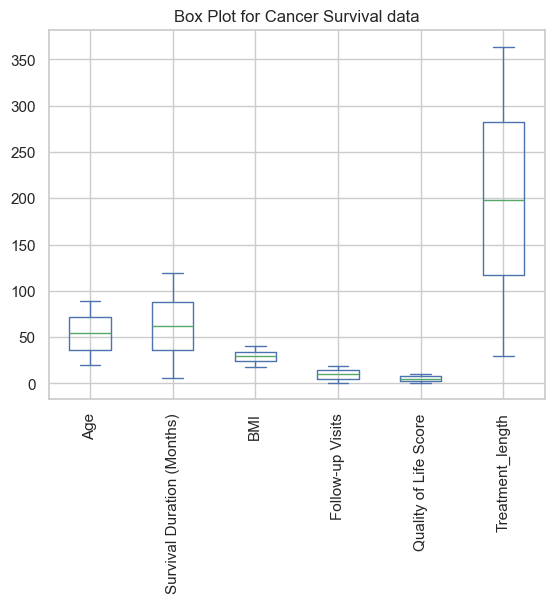

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a box plot for 'charges' to visualise outliers
plt.figure(figsize=(10, 7))
df.plot(kind='box', y=['Age', 'Survival Duration (Months)', 'BMI', 'Follow-up Visits', 'Quality of Life Score', 'Treatment_length'], rot=90)
plt.title('Box Plot for Cancer Survival data')
plt.show()

In [67]:
df_sub = df[['Age', 'Survival Duration (Months)', 'BMI', 'Follow-up Visits', 'Quality of Life Score', 'Treatment_length']]

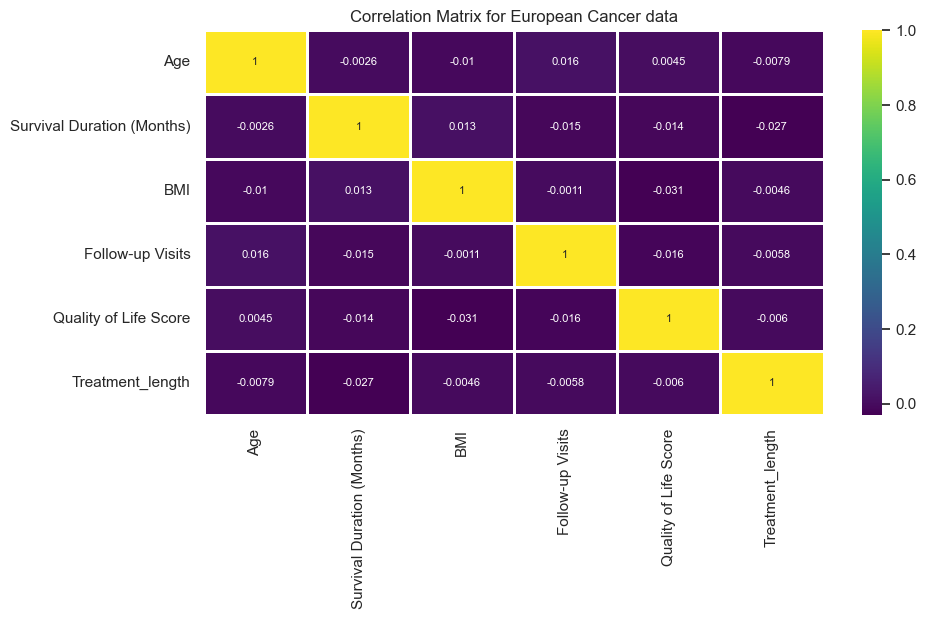

In [68]:
#heatmap for correlation matrix
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,5))
df_corr = df_sub.corr()
sns.heatmap(data=df_corr, annot=True, linewidths=1.0, annot_kws={"size": 8},cmap='viridis')
plt.title('Correlation Matrix for European Cancer data')
plt.show()

In [ ]:
'''
Chi-Square Test - to test the association between the categorical variables 'Cancer Type' and 'Cancer Stage'
'''

In [57]:
#Chi-square test - to test association between categorical variables (Cancer Type and Cancer Stage)
from scipy.stats import chi2_contingency


# Create a contingency table
contingency_table = pd.crosstab(df['Cancer Type'], df['Cancer Stage'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output results
print("Contingency Table:")
print(contingency_table)
print(f"\nChi-square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Interpretation
if p < 0.05:
    print("\nResult: Significant association between Cancer Type and Cancer Stage.")
else:
    print("\nResult: No significant association between Cancer Type and Cancer Stage.")

Contingency Table:
Cancer Stage    I   II  III   IV
Cancer Type                     
Breast        241  216  157  125
Colorectal    208  221  193  120
Leukemia      202  215  177  119
Lung          212  215  174  108
Ovarian       237  236  196  106
Pancreatic    237  223  199  130
Prostate      202  230  188  102

Chi-square Statistic: 15.69518363797021
P-value: 0.6138110812262552
Degrees of Freedom: 18
Expected Frequencies:
[[219.17922528 221.60030834 182.86297938 115.35748699]
 [220.0689921  222.49990364 183.60531894 115.82578532]
 [211.46791289 213.80381576 176.42936982 111.29890152]
 [210.28155714 212.60435537 175.43958373 110.67450376]
 [229.85642706 232.39545192 191.77105415 120.97706687]
 [234.00867219 236.59356331 195.23530545 123.16245905]
 [214.13721334 216.50260166 178.65638851 112.70379649]]

Result: No significant association between Cancer Type and Cancer Stage.


In [132]:
df.to_csv(f'data/processed/cancer_patient_data_cleaned.csv')